# Driving Growth and Efficiency: Business Insights and Supply Chain Analysis

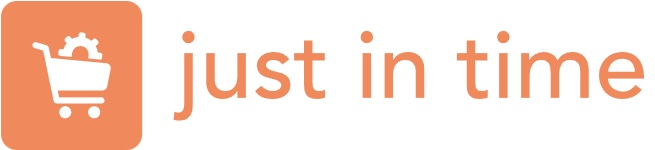

In [58]:
from IPython.display import Image

# Replace 'data/JIT_LOGO.jpg' with the correct path to your image
image_path = 'data/JIT_LOGO.jpg'

# Display the image in the notebook
Image(filename=image_path)

## Importing Libraries

- This section of the code is responsible for importing the necessary libraries and modules that will be used throughout the notebook for data visualization and analysis.

In [59]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Data Cleaning

This section of the code involves data cleaning and preparation steps for the dataset. The key data cleaning tasks performed are as follows:

1. **Loading Data**: The code loads three datasets: 'orders_and_shipments.csv', 'inventory.csv', and 'fulfillment.csv', using the pandas library's read_csv() function.

3. **Column Names Cleaning**: The column names in the 'orders_and_shipments.csv' dataset are cleaned by removing leading and trailing whitespaces using the str.strip() method.
 
5. **Data Type Conversion**: The 'Order Time' column is converted to the datetime data type using pd.to_datetime(). Additionally, the 'Discount %' column is processed by removing the '%' symbol and converting it to a numeric data type using pd.to_numeric().

7. **Hour Extraction**: A new column 'Order Hour' is created by extracting the hour from the 'Order Time' column, and the original 'Order Time' column is dropped using the drop() method.

9. **Numeric Column Validation**: The code checks for any non-numeric values in the numeric columns ('int64' and 'float64') of the dataset. If there are any non-numeric values, it prints the column names that contain them.

11. **Display Data Types**: After data cleaning, the code displays the data types of each column to ensure proper conversion.

By completing these data cleaning tasks, the dataset is now ready for further analysis and visualization.

In [60]:
data = pd.read_csv("data/orders_and_shipments.csv")
data

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,Product Name,Customer ID,Customer Market,Customer Region,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,7840,LATAM,Central America,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1203,LATAM,South America,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,10866,LATAM,Central America,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,Europe,Northern Europe,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,3576,Europe,Northern Europe,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,73246,176561,201712,2017,12,5,04:59,1,Fan Shop,Toys,Toys,16799,Pacific Asia,Oceania,Australia,Puerto Rico,2017,12,11,Standard Class,4,12,0.06,6
30867,7908,19762,201504,2015,4,26,10:10,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,11950,LATAM,South America,Paraguay,Puerto Rico,2015,4,30,Standard Class,4,30,0.12,68
30868,29326,73368,201603,2016,3,4,01:51,1,Fan Shop,Hunting & Shooting,ENO Atlas Hammock Straps,8161,Pacific Asia,South Asia,India,Puerto Rico,2016,3,6,Second Class,2,30,0.09,68
30869,63308,158284,201707,2017,7,13,03:15,1,Fan Shop,Hunting & Shooting,insta-bed Neverflat Air Mattress,5733,Europe,Western Europe,Germany,Puerto Rico,2017,7,17,Second Class,2,150,0.02,60


In [61]:
# Load the orders and shipments data
orders_shipments_df = pd.read_csv('data/orders_and_shipments.csv')

# Load the inventory data
inventory_df = pd.read_csv('data/inventory.csv')

# Load the fulfillment data
fulfillment_df = pd.read_csv('data/fulfillment.csv')

data.columns = data.columns.str.strip()
print(data.columns)

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year',
       'Order Month', 'Order Day', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales',
       'Discount %', 'Profit'],
      dtype='object')


In [62]:
#Check Column DTypes
print(data.dtypes)

#Check for text strings in numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
non_numeric_columns = []

for column in numeric_columns:
    if data[column].apply(lambda x: isinstance(x, str)).any():
        non_numeric_columns.append(column)

if len(non_numeric_columns) > 0:
    print("Non-numeric values found in the following columns:")
    print(non_numeric_columns)
else:
    print("All numeric columns contain only numeric values.")


Order ID                      int64
Order Item ID                 int64
Order YearMonth               int64
Order Year                    int64
Order Month                   int64
Order Day                     int64
Order Time                   object
Order Quantity                int64
Product Department           object
Product Category             object
Product Name                 object
Customer ID                   int64
Customer Market              object
Customer Region              object
Customer Country             object
Warehouse Country            object
Shipment Year                 int64
Shipment Month                int64
Shipment Day                  int64
Shipment Mode                object
Shipment Days - Scheduled     int64
Gross Sales                   int64
Discount %                   object
Profit                        int64
dtype: object
All numeric columns contain only numeric values.


In [63]:
# Convert 'Order Time' column to datetime type
data['Order Time'] = pd.to_datetime(data['Order Time'])

# Extract hour from 'Order Time' column
data['Order Hour'] = data['Order Time'].dt.hour

# Drop the original 'Order Time' column
data = data.drop(columns=['Order Time'])

# Remove '%' symbol from 'Discount %' column
data['Discount %'] = data['Discount %'].str.replace('%', '')

# Convert 'Discount %' column to numeric type
data['Discount %'] = pd.to_numeric(data['Discount %'], errors='coerce')


In [64]:
#Check Column DTypes
print(data.dtypes)

Order ID                       int64
Order Item ID                  int64
Order YearMonth                int64
Order Year                     int64
Order Month                    int64
Order Day                      int64
Order Quantity                 int64
Product Department            object
Product Category              object
Product Name                  object
Customer ID                    int64
Customer Market               object
Customer Region               object
Customer Country              object
Warehouse Country             object
Shipment Year                  int64
Shipment Month                 int64
Shipment Day                   int64
Shipment Mode                 object
Shipment Days - Scheduled      int64
Gross Sales                    int64
Discount %                   float64
Profit                         int64
Order Hour                     int64
dtype: object


## Business Sales and Profit Analysis

### Sales Performance by Product Category

- The code groups the data by 'Product Category' and calculates the sum of 'Gross Sales' and 'Profit' for each category. The results are displayed in a tabular format.

In [65]:
sales_performance = data.groupby('Product Category').agg({'Gross Sales': 'sum', 'Profit': 'sum'})

print(sales_performance)

                      Gross Sales  Profit
Product Category                         
Accessories                 23875   18066
As Seen on  TV!              3000    1485
Baby                         2183    1036
Baseball & Softball         16655   11507
Basketball                   2700    1188
Books                        1736     840
Boxing & MMA                16425    9847
CDs                           693     378
Cameras                     86332   41829
Camping & Hiking           728100  364050
Cardio Equipment           650270  524390
Children's Clothing          3213    1521
Cleats                     778920  631740
Consumer Electronics        12650    6150
Crafts                      39185   19635
DVDs                        20008    9638
Electronics                 59784   43819
Fishing                   1151200  575600
Fitness Accessories          4655    3498
Garden                      35711   17286
Girls' Apparel              26265   17712
Golf Apparel                 4430 

### Business Performance Analysis

- This part calculates the total 'Gross Sales' and 'Total Profits' by summing up the corresponding columns. It also calculates the 'Sales Growth Rate' by year and displays the results in a tabular format.

In [66]:
# Calculate Gross Sales by summing up the 'Gross Sales' column
gross_sales = data['Gross Sales'].sum()

# Calculate Total Profits by summing up the 'Profit' column
total_profits = data['Profit'].sum()

# Calculate the Sales Growth Rate
# First, group the data by 'Order Year' and calculate the total Gross Sales for each year
yearly_sales = data.groupby('Order Year')['Gross Sales'].sum().reset_index()

# Calculate the percentage change in Gross Sales from one year to the next
yearly_sales['Sales Growth Rate'] = yearly_sales['Gross Sales'].pct_change() * 100

# Display the results
print(f'Gross Sales: ${gross_sales}')
print(f'Total Profits: ${total_profits}')
print('Sales Growth Rate:')
print(yearly_sales[['Order Year', 'Sales Growth Rate']])

Gross Sales: $6181476
Total Profits: $3994192
Sales Growth Rate:
   Order Year  Sales Growth Rate
0        2015                NaN
1        2016           4.770046
2        2017         -16.165676


#### Visualization: Gross Sales and Total Profits by Year

- The bar plot illustrates the Gross Sales and Total Profits by year.
- The blue bars represent Gross Sales, while the red bars represent Total Profits.
- Both Gross Sales and Total Profits have shown an increasing trend over the years.

#### Visualization: Sales Growth Rate Over the Years

- The line plot shows the Sales Growth Rate (%) over the years.
- The Sales Growth Rate is calculated as the percentage change in Gross Sales from the previous year.
- There is a noticeable decline in the Sales Growth Rate across the years.

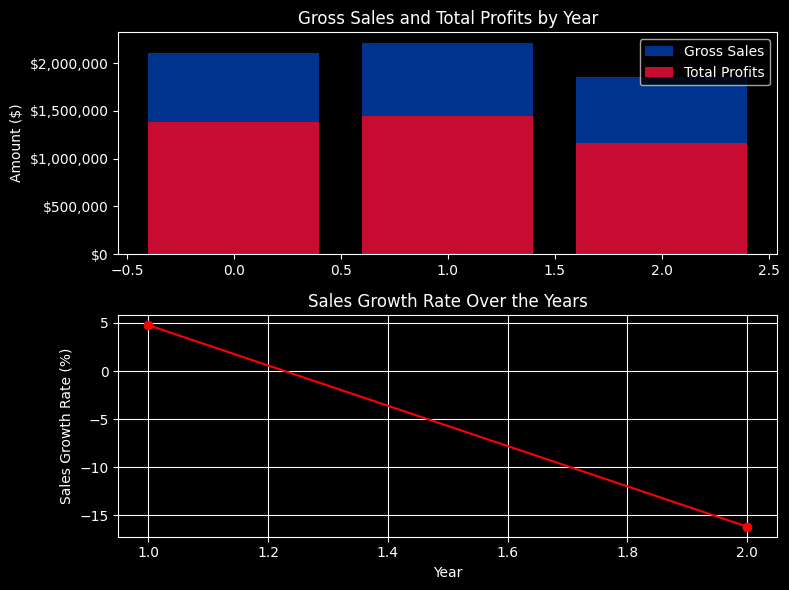

In [67]:
# Bar Plot for Gross Sales and Total Profits
years = yearly_sales['Order Year']
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Calculate Total Profits by summing up the 'Profit' column for each year
yearly_profits = data.groupby('Order Year')['Profit'].sum().reset_index()

# Plot for Gross Sales
ax1.bar(yearly_sales.index, yearly_sales['Gross Sales'], label='Gross Sales', color='#00338D')
ax1.set_ylabel('Amount ($)')
ax1.set_title('Gross Sales and Total Profits by Year')
ax1.legend()

# Plot for Total Profits
ax1.bar(yearly_profits.index, yearly_profits['Profit'], label='Total Profits', color='#C60C30')
ax1.set_ylabel('Amount ($)')
ax1.set_title('Gross Sales and Total Profits by Year')
ax1.legend()

# Calculate the Sales Growth Rate
yearly_sales['Sales Growth Rate'] = yearly_sales['Gross Sales'].pct_change() * 100

# Plot for Sales Growth Rate
ax2.plot(yearly_sales.index, yearly_sales['Sales Growth Rate'], marker='o', color='red')
ax2.set_xlabel('Year')
ax2.set_ylabel('Sales Growth Rate (%)')
ax2.set_title('Sales Growth Rate Over the Years')
ax2.grid()

# Format y-axis as whole numbers
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}".format(x)))

plt.tight_layout()
plt.show()

#### Visualization: Products by Sales and Profits:

- The code creates bar plots to visualize the top 12 product categories based on 'Gross Sales' and 'Profit'. 
- The plots use a dark background and color-blind friendly colors.
- A treemap visualization is used to show customer segmentation by 'Customer Market', 'Customer Region', and 'Customer Country'.

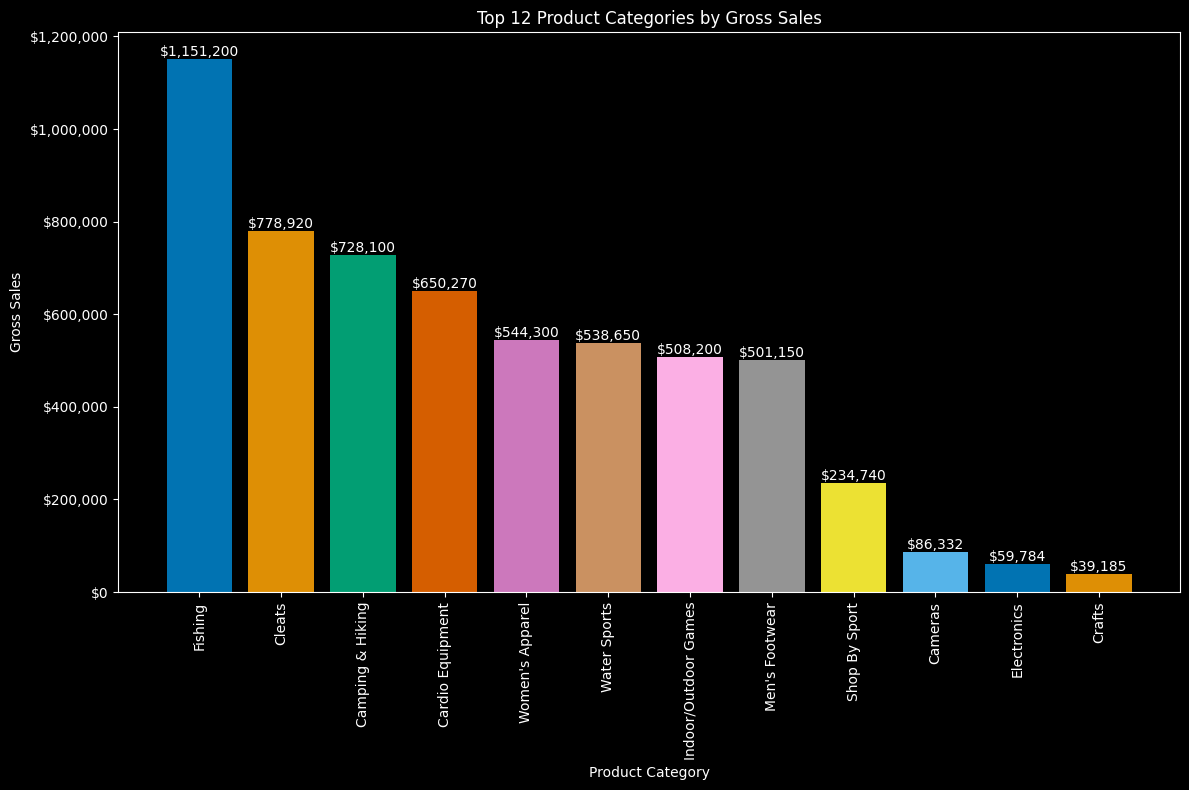

In [68]:
# Sort the sales_performance dataframe by gross sales in descending order
sales_performance = sales_performance.sort_values('Gross Sales', ascending=False)

# Select the top 12 product categories based on gross sales
top_12_sales = sales_performance.head(12)

# Define color palette for color-blind friendly colors
colors = sns.color_palette("colorblind", len(top_12_sales))

# Create a dark background
plt.style.use('dark_background')

# Create a bar chart for the top 10 product categories with color palette
plt.figure(figsize=(12, 8))
bars = plt.bar(top_12_sales.index, top_12_sales['Gross Sales'], color=colors)
plt.xlabel('Product Category')
plt.ylabel('Gross Sales')
plt.title('Top 12 Product Categories by Gross Sales')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees

# Format y-axis labels to display gross sales amounts with dollar symbol
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom')

# Save the chart as a PNG image
plt.savefig('top_12_sales_chart.png', dpi=300)

# Show the chart
plt.tight_layout()
plt.show()

In [69]:
print(sales_performance)

                      Gross Sales  Profit
Product Category                         
Fishing                   1151200  575600
Cleats                     778920  631740
Camping & Hiking           728100  364050
Cardio Equipment           650270  524390
Women's Apparel            544300  452750
Water Sports               538650  269304
Indoor/Outdoor Games       508200  427000
Men's Footwear             501150  250575
Shop By Sport              234740  184550
Cameras                     86332   41829
Electronics                 59784   43819
Crafts                      39185   19635
Garden                      35711   17286
Girls' Apparel              26265   17712
Accessories                 23875   18066
Golf Gloves                 20080   12667
DVDs                        20008    9638
Golf Shoes                  19431   11751
Baseball & Softball         16655   11507
Boxing & MMA                16425    9847
Sporting Goods              15088    7222
Kids' Golf Clubs            14929 

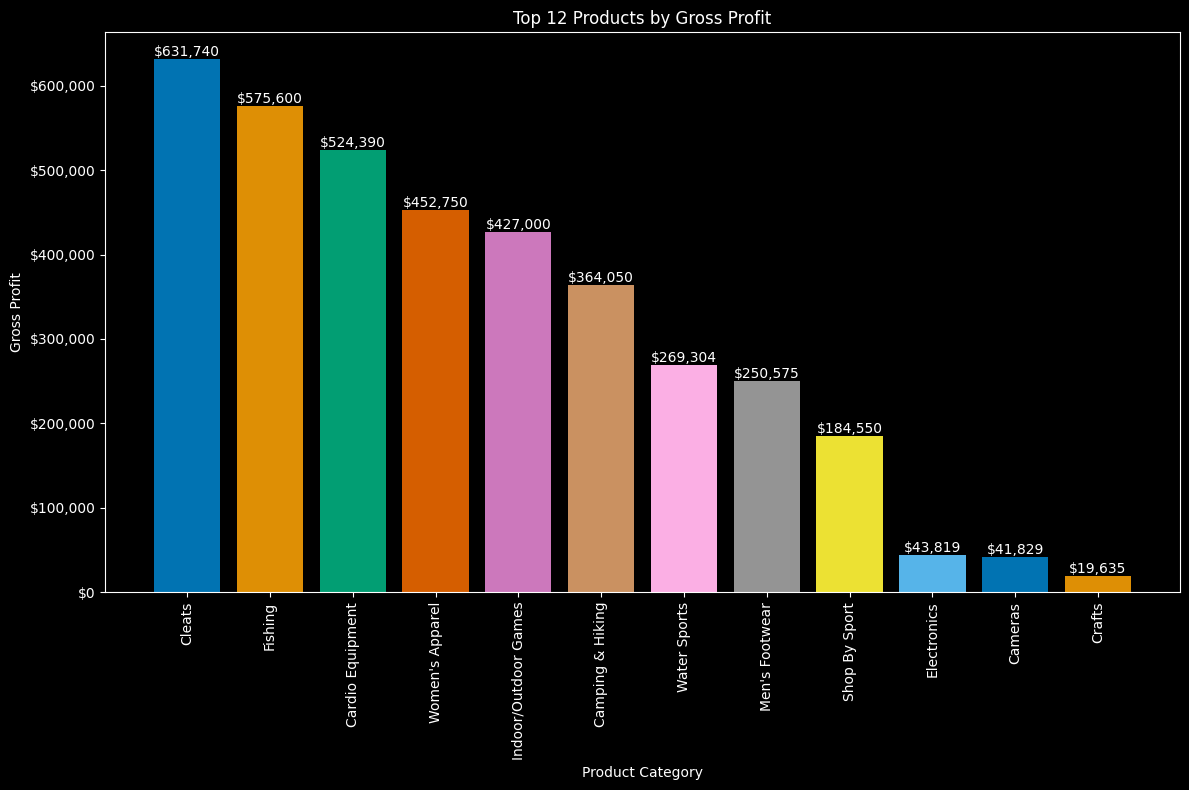

In [70]:
# Sort the sales_performance dataframe by gross profit in descending order
sales_performance = sales_performance.sort_values('Profit', ascending=False)

# Select the top 12 products based on gross profit
top_12_profit = sales_performance.head(12)

# Define color palette for color-blind friendly colors
colors = sns.color_palette("colorblind", len(top_12_profit))

# Create a bar chart for the top 10 products with color palette
plt.figure(figsize=(12, 8))
bars = plt.bar(top_12_profit.index, top_12_profit['Profit'], color=colors)
plt.xlabel('Product Category')
plt.ylabel('Gross Profit')
plt.title('Top 12 Products by Gross Profit')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees

# Format y-axis labels to display gross profit amounts with dollar symbol
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.0f}', ha='center', va='bottom')

# Save the chart as a PNG image
plt.savefig('top_12_profit_chart.png', dpi=300)

# Show the chart
plt.tight_layout()
plt.show()

### Customer Segmentation

- Customer segmentation based on 'Customer Market', 'Customer Region', and 'Customer Country'.
- Metrics calculated: 'Gross Sales', 'Order Quantity', and 'Profit'.
- Treemap visualization created with 'Gross Sales' as the size of nested rectangles, sorted in descending order.

In [71]:
customer_segmentation = data.groupby(['Customer Market', 'Customer Region', 'Customer Country']).agg({'Gross Sales': 'sum', 'Order Quantity': 'count', 'Profit': 'sum'})

print(customer_segmentation)

                                                              Gross Sales  ...  Profit
Customer Market Customer Region Customer Country                           ...        
Africa          Central Africa  Angola                               8671  ...    6299
                                Cameroon                            10820  ...    6798
                                Democratic Republic of Congo        27856  ...   17888
                                Gabon                                4275  ...    2789
                                Republic of Congo                    1645  ...    1269
...                                                                   ...  ...     ...
Pacific Asia    West Asia       Saudi Arabia                        35701  ...   23147
                                Syria                                3770  ...    2403
                                Turkey                             114352  ...   72698
                                UAE        

#### Visualization: Customer Segmentation

- Data grouped by Customer Market, Customer Region, and Customer Country.
- Treemap shows Gross Sales for each segment, with color-coded regions.
- Provides insights into sales distribution across markets, regions, and countries.

In [72]:
# Group the data by customer market, region, and country
customer_segmentation = data.groupby(['Customer Market', 'Customer Region', 'Customer Country']).agg({'Gross Sales': 'sum', 'Order Quantity': 'count', 'Profit': 'sum'})

# Sort the data by gross sales in descending order
customer_segmentation = customer_segmentation.sort_values('Gross Sales', ascending=False)

# Reset the index to convert the grouped columns to regular columns
customer_segmentation = customer_segmentation.reset_index()

# Create a treemap visualization using plotly
fig = px.treemap(customer_segmentation, path=['Customer Market', 'Customer Region', 'Customer Country'], values='Gross Sales')

# Update the layout to set a dark background and color-blind friendly colors
fig.update_layout(
    template='plotly_dark',
    colorway=px.colors.qualitative.Plotly,  # Use Plotly's default colorway
    title='Customer Segmentation by Market, Region, and Country'
)

# Save the plot as a PNG image
fig.write_image('customer_segmentation_treemap.png', width=800, height=600, scale=2)

# Show the plot
fig.show()

### Seasonality Analysis

- The data is grouped by 'Order Year' and 'Order Month', and the sum of 'Gross Sales' and the count of 'Order Quantity' are calculated for each month. A line chart is created to visualize the seasonality of sales based on different months and years.

In [73]:
seasonality_analysis = data.groupby(['Order Year', 'Order Month']).agg({'Gross Sales': 'sum', 'Order Quantity': 'count'})

print(seasonality_analysis)

                        Gross Sales  Order Quantity
Order Year Order Month                             
2015       1                 194792             982
           2                 177835             865
           3                 180387             929
           4                 185757             942
           5                 160554             816
           6                 174748             871
           7                 172124             881
           8                 176947             878
           9                 167648             848
           10                181203             886
           11                169121             854
           12                171463             869
2016       1                 193825             974
           2                 163495             820
           3                 174607             870
           4                 177073             901
           5                 187525             965
           6

#### Visualization: Gross Sales by Month and Year

- The line chart illustrates the monthly trends in Gross Sales over multiple years, allowing for easy identification of seasonal patterns and overall sales growth.
- By observing the peaks and dips in the chart, Just In Time can identify the months with the highest and lowest sales, helping plan promotions, inventory, and marketing strategies accordingly.
- The Y-axis labels formatted as dollar amounts provide a clear understanding of the revenue generated each month, aiding in quick assessment and comparison of performance across different periods. Additionally, it facilitates spotting any sudden spikes or drops in sales, which might require further investigation or action.

In [74]:
# Reset the index to convert the grouped columns to regular columns
seasonality_analysis = seasonality_analysis.reset_index()

# Create a line chart for Gross Sales by Order Year and Order Month
fig = px.line(seasonality_analysis, x='Order Month', y='Gross Sales', color='Order Year',
              labels={'x': 'Order Month', 'y': 'Gross Sales', 'color': 'Order Year'},
              title='Seasonality Analysis: Gross Sales by Month and Year')

# Format the y-axis tick labels as dollar amounts
fig.update_yaxes(tickprefix='$')

# Remove grid lines
fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=False))

# Set black background
fig.update_layout(template='plotly_dark')

# Save the line chart for seasonality analysis as an image file
fig.write_image("seasonality_analysis_line_chart.png")

# Show the line chart
fig.show()

### Discount Analysis

- The data is grouped by 'Discount %', and the sum of 'Gross Sales' and 'Profit' for each discount percentage is calculated. A bar chart is created to visualize the relationship between discount percentage and sales/profits.

In [75]:
discount_analysis = data.groupby('Discount %').agg({'Gross Sales': 'sum', 'Profit': 'sum'})

print(discount_analysis)

            Gross Sales  Profit
Discount %                     
0.01             349844  224907
0.02             354427  229618
0.03             339446  217201
0.04             337610  218190
0.05             338235  218798
0.06             343307  223789
0.07             336316  217944
0.09             339819  217702
0.10             341364  220396
0.12             341596  222635
0.13             354977  231612
0.15             336045  216027
0.16             352386  226095
0.17             352048  226641
0.18             337857  219996
0.20             330894  215865
0.25             345294  220940


#### Visualization: Gross Sales and Profit by Discount %

- The bar chart showcases the relationship between Discount % and the corresponding Gross Sales and Profit figures. This allows the business to evaluate the impact of discounts on revenue and profitability.
- By analyzing the chart, organizations can identify the discount ranges that lead to the highest Gross Sales without significantly compromising the overall Profit. This insight aids in optimizing pricing and discount strategies for improved sales performance.

In [76]:
# Reset the index to convert the grouped columns to regular columns
discount_analysis = discount_analysis.reset_index()

# Create a bar chart for Gross Sales and Profit by Discount %
fig = px.bar(discount_analysis, x='Discount %', y=['Gross Sales', 'Profit'],
             labels={'x': 'Discount %', 'y': 'Amount'},
             title='Discount Analysis: Gross Sales and Profit by Discount %')

# Set black background
fig.update_layout(template='plotly_dark')

# Save the bar chart for discount analysis as an image file
fig.write_image("discount_analysis_bar_chart.png")

# Show the bar chart
fig.show()

In Summary, the analysis and visualizations help in understanding the sales trends, customer segmentation, and the impact of discounts on sales and profits.

## Supply Chain Analysis

### Inventory Analysis

- The code groups the inventory data by 'Product Name' and calculates the average 'Warehouse Inventory' and 'Inventory Cost Per Unit'.
- It then calculates the 'Inventory Turnover' for each product by dividing the average 'Warehouse Inventory' by the total order quantity.
- The results are printed in a DataFrame with columns for 'Product Name', 'Warehouse Inventory', 'Inventory Cost Per Unit', and 'Inventory Turnover'.

In [77]:
print(inventory_df.columns)

Index(['Product Name', ' Year Month ', ' Warehouse Inventory ',
       'Inventory Cost Per Unit'],
      dtype='object')


In [78]:
inventory_analysis = inventory_df.groupby('Product Name').agg({' Warehouse Inventory ': 'mean', 'Inventory Cost Per Unit': 'mean'})
inventory_analysis['Inventory Turnover'] = inventory_analysis[' Warehouse Inventory '] / data['Order Quantity'].sum()

print(inventory_analysis)

                                                Warehouse Inventory   ...  Inventory Turnover
Product Name                                                          ...                    
Adult dog supplies                                          0.742857  ...            0.000011
Baby sweater                                                1.228571  ...            0.000019
Bag Boy Beverage Holder                                     4.277778  ...            0.000064
Bag Boy M330 Push Cart                                      0.861111  ...            0.000013
Bowflex SelectTech 1090 Dumbbells                          23.171429  ...            0.000349
...                                                              ...  ...                 ...
adidas Kids' F5 Messi FG Soccer Cleat                       3.111111  ...            0.000047
adidas Men's F10 Messi TRX FG Soccer Cleat                  5.611111  ...            0.000085
adidas Men's Germany Black Crest Away Tee                   

#### Visualization: Average Warehouse Inventory by Product:

- The code creates a bar chart using Plotly (using the px.bar function) to visualize the average warehouse inventory for each product.

#### Visualization: Inventory Cost Per Unit by Product

- The code creates another bar chart using Plotly to visualize the inventory cost per unit for each product.

In [79]:
 # Format the Inventory Cost Per Unit column to display as dollar amount with 2 decimal places
inventory_df['Inventory Cost Per Unit'] = inventory_df['Inventory Cost Per Unit'].apply(lambda x: '${:.2f}'.format(x))

# Create a bar chart for Average Warehouse Inventory
fig_inventory = px.bar(inventory_df, x='Product Name', y=' Warehouse Inventory ',
                       labels={'x': 'Product Name', 'y': 'Average Warehouse Inventory'},
                       title='Average Warehouse Inventory by Product')

# Create a bar chart for Inventory Cost Per Unit
fig_cost = px.bar(inventory_df, x='Product Name', y='Inventory Cost Per Unit',
                  labels={'x': 'Product Name', 'y': 'Inventory Cost Per Unit ($)'},
                  title='Inventory Cost Per Unit by Product')

# Show the visuals
fig_inventory.show()
fig_cost.show()

### Shipment Performance Analysis

- The code groups the shipment data by 'Shipment Mode' and 'Customer Market' and calculates the average 'Shipment Days - Scheduled', total 'Gross Sales', and total 'Profit' for each group.
- The results are printed in a DataFrame with columns for 'Shipment Mode', 'Customer Market', 'Shipment Days - Scheduled', 'Gross Sales', and 'Profit'.

In [80]:
shipment_performance = data.groupby(['Shipment Mode', 'Customer Market']).agg({'Shipment Days - Scheduled': 'mean', 'Gross Sales': 'sum', 'Profit': 'sum'})

print(shipment_performance)

                                Shipment Days - Scheduled  Gross Sales  Profit
Shipment Mode  Customer Market                                                
First Class    Africa                                 1.0        62998   40910
               Europe                                 1.0       289981  183413
               LATAM                                  1.0       285963  188180
               North America                          1.0       137570   90027
               Pacific Asia                           1.0       206227  130998
Same Day       Africa                                 3.0        30221   20524
               Europe                                 3.0       119533   75287
               LATAM                                  3.0        97905   63665
               North America                          3.0        65187   41597
               Pacific Asia                           3.0        78320   51544
Second Class   Africa                               

### Time-to-Fulfillment Analysis

- The code groups the fulfillment data by 'Product Name' and calculates the average 'Warehouse Order Fulfillment (days)' for each product.
- The results are printed in a DataFrame with columns for 'Product Name' and 'Warehouse Order Fulfillment (days)'.
- A bar chart using Plotly is created to visualize the average fulfillment time for each product, and the chart is saved as an image file named "time_to_fulfillment_bar_chart.png".

In [81]:
print(fulfillment_df.columns)

Index(['Product Name', ' Warehouse Order Fulfillment (days) '], dtype='object')


In [82]:
time_to_fulfillment = fulfillment_df.groupby('Product Name').agg({' Warehouse Order Fulfillment (days) ': 'mean'})

print(time_to_fulfillment)

                                                Warehouse Order Fulfillment (days) 
Product Name                                                                       
Adult dog supplies                                                              6.9
Baby sweater                                                                    7.9
Bag Boy Beverage Holder                                                         6.4
Bag Boy M330 Push Cart                                                          8.4
Bowflex SelectTech 1090 Dumbbells                                               7.7
...                                                                             ...
adidas Kids' F5 Messi FG Soccer Cleat                                           2.7
adidas Men's F10 Messi TRX FG Soccer Cleat                                      5.6
adidas Men's Germany Black Crest Away Tee                                       1.0
adidas Youth Germany Black/Red Away Match Soc                               

#### Visualization: Average Fulfillment Time by Product

- The bar chart illustrates the average fulfillment time for each product, enabling businesses to identify potential bottlenecks in their order processing and delivery systems.
- With fulfillment time data presented in this visual, the company can pinpoint products that experience longer processing times, helping focus on streamlining operations and improving customer satisfaction.

In [83]:
# Reset the index to convert the grouped column to a regular column
time_to_fulfillment = time_to_fulfillment.reset_index()

# Sort the DataFrame by fulfillment time in descending order
time_to_fulfillment = time_to_fulfillment.sort_values(' Warehouse Order Fulfillment (days) ', ascending=False)

# Create a bar chart for average warehouse order fulfillment time by product
fig = px.bar(time_to_fulfillment, x='Product Name', y=' Warehouse Order Fulfillment (days) ',
             labels={'Product Name': 'Product', ' Warehouse Order Fulfillment (days) ': 'Average Fulfillment Time (days) '},
             title='Time-to-Fulfillment Analysis: Average Fulfillment Time by Product')

# Customize the appearance of the chart
fig.update_traces(marker_color='lightskyblue')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-90)

# Set black background for the chart
fig.update_layout(template='plotly_dark')

# Save the bar chart for time-to-fulfillment analysis as an image file
fig.write_image("time_to_fulfillment_bar_chart.png")

# Show the bar chart
fig.show()

### Stock Difference Analysis:

- The code calculates the total demand and total supply by summing up the 'Order Quantity' and 'Warehouse Inventory' columns, respectively.
- It then merges the data and inventory DataFrames based on 'Product Name' to get a combined DataFrame.
- The stock difference (Total Demand - Total Supply) is calculated for each product and sorted in ascending order.
- The top 15 products with the highest negative stock difference are printed, indicating the products with the highest demand-supply gap.

In [84]:
# Calculate the Total Demand by summing up the 'Order Quantity' column
total_demand = data['Order Quantity'].sum()

# Calculate the Total Supply by summing up the 'Warehouse Inventory' column
total_supply = inventory_df[' Warehouse Inventory '].sum()

# Calculate the Stock Difference (Total Demand - Total Supply)
stock_difference = total_demand - total_supply

# Merge data and inventory_df on 'Product Name' to get a combined DataFrame
combined_df = data.merge(inventory_df, on='Product Name', how='inner')

# Calculate the Stock Difference for each product
combined_df['Stock Difference'] = combined_df['Order Quantity'] - combined_df[' Warehouse Inventory ']

# Group by 'Product Name' and sum the Stock Difference for each product
result_df = combined_df.groupby('Product Name')['Stock Difference'].sum().reset_index()

# Sort the DataFrame by Stock Difference in descending order
result_df = result_df.sort_values(by='Stock Difference', ascending=True)

# Print the results
print('Stock Difference (Total Demand - Total Supply):', stock_difference)
print()
print(result_df.head(15))

Stock Difference (Total Demand - Total Supply): -4647

                                      Product Name  Stock Difference
68                Perfect Fitness Perfect Rip Deck         -61686180
56            Nike Men's Dri-FIT Victory Golf Polo         -38385236
64                O'Brien Men's Neoprene Life Vest         -32485768
53         Nike Men's CJ Elite 2 TD Football Cleat         -15739965
58               Nike Men's Free 5.0+ Running Shoe         -13607880
97   Under Armour Girls' Toddler Spine Surge Runni         -11284416
21       Field & Stream Sportsman 16 Gun Fire Safe          -7465532
67                     Pelican Sunstream 100 Kayak          -6209196
18   Diamondback Women's Serene Classic Comfort Bi          -5878194
105                                     Web Camera            -46222
15                                            DVDs            -14396
96                                            Toys             -7154
82       Team Golf Pittsburgh Steelers Putter Gr

### Average Shipment Delays Over Months:

- The code groups the data by 'Order Year' and 'Order Month' and calculates the average shipment delay for each month.
- A line chart is created to visualize the average shipment delays over months, with separate lines for each year.

#### Visualization: Average Shipment Delays

- The line chart showcases the average shipment delay (in days) for each month over the years, providing valuable insights into seasonal patterns or trends in delivery delays.
- By analyzing the data presented in the visual, the business can identify months with consistently higher or lower shipment delays, helping plan logistics and inventory management accordingly.
- The custom colors assigned to each year's data series facilitate easy differentiation and comprehension of how shipment delays vary across different years, enhancing the overall interpretability of the chart. The absence of gridlines further improves clarity and ensures that attention remains on the data points and trends.

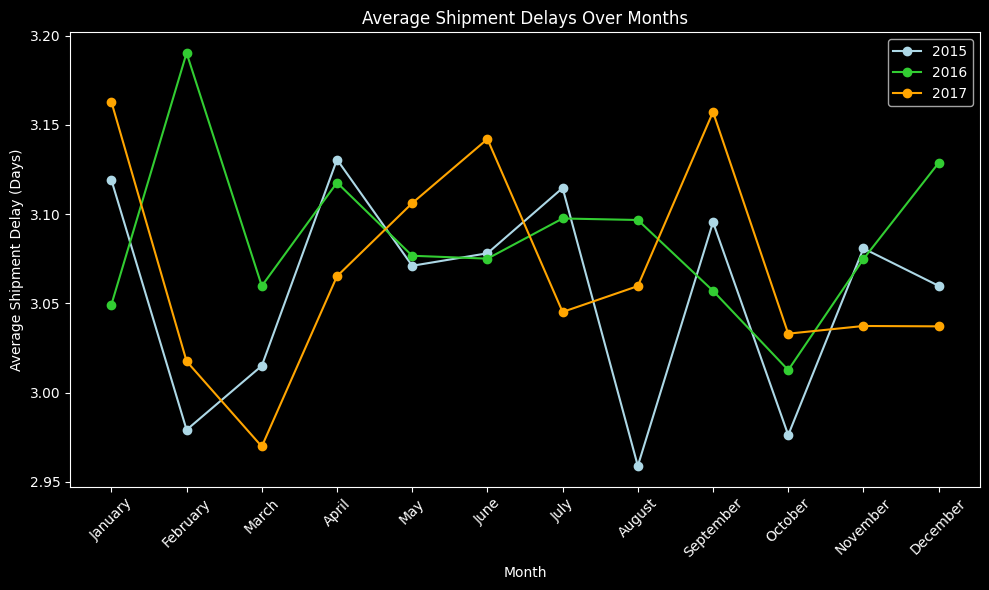

In [85]:
# Create a dictionary to map month numbers to month names
month_names = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

# Group the data by 'Order Year' and 'Order Month' and calculate the average shipment delay for each month
average_shipment_delay = data.groupby(['Order Year', 'Order Month'])['Shipment Days - Scheduled'].mean().reset_index()

# Replace the numeric month values with corresponding month names
average_shipment_delay['Order Month'] = average_shipment_delay['Order Month'].map(month_names)

# Create a line chart with separate lines for each year and custom colors
plt.figure(figsize=(10, 6))
for year in average_shipment_delay['Order Year'].unique():
    yearly_data = average_shipment_delay[average_shipment_delay['Order Year'] == year]
    if year == 2015:
        plt.plot(yearly_data['Order Month'], yearly_data['Shipment Days - Scheduled'], marker='o', label=str(year), color='#ADD8E6')
    elif year == 2016:
        plt.plot(yearly_data['Order Month'], yearly_data['Shipment Days - Scheduled'], marker='o', label=str(year), color='limegreen')
    elif year == 2017:
        plt.plot(yearly_data['Order Month'], yearly_data['Shipment Days - Scheduled'], marker='o', label=str(year), color='orange')

plt.xlabel('Month')
plt.ylabel('Average Shipment Delay (Days)')
plt.title('Average Shipment Delays Over Months')
plt.xticks(rotation=45)
plt.legend()

# Remove gridlines
plt.grid(False)

plt.tight_layout()
plt.show()

### Supply vs. Demand Analysis:

- The code calculates the demand and supply percentages for each product based on the total demand and total supply.
- The products are then grouped and sorted by their demand percentage in ascending order.
- The top 15 products with the highest demand percentages are printed, along with the overall supply vs. demand ratio.

In [86]:
# Merge data and inventory_df on 'Product Name' to get a combined DataFrame
combined_df = data.merge(inventory_df, on='Product Name', how='inner')

# Calculate Total Demand by summing up the 'Order Quantity' column from the 'data' DataFrame
total_demand = data['Order Quantity'].sum()

# Calculate Total Supply by summing up the 'Warehouse Inventory' column from the 'inventory_df' DataFrame
total_supply = inventory_df[' Warehouse Inventory '].sum()

# Calculate the percentage of Total Demand and Total Supply for each product
combined_df['Demand Percentage'] = combined_df['Order Quantity'] / total_demand
combined_df['Supply Percentage'] = combined_df[' Warehouse Inventory '] / total_supply

# Group by 'Product Name' and sum the percentages
grouped_df = combined_df.groupby('Product Name')[['Demand Percentage', 'Supply Percentage']].sum()

# Sort the DataFrame in ascending order based on 'Demand Percentage'
grouped_df = grouped_df.sort_values('Demand Percentage', ascending=True)

# Get the top 15 products
top_15_products = grouped_df.iloc[-15:]

# Calculate the Supply vs. Demand Ratio
supply_vs_demand_ratio = total_supply / total_demand

print('Total Demand:', total_demand)
print('Total Supply:', total_supply)
print('Supply vs. Demand Ratio:', supply_vs_demand_ratio)
print(top_15_products)

Total Demand: 66367
Total Supply: 71014
Supply vs. Demand Ratio: 1.0700197387255714
                                               Demand Percentage  Supply Percentage
Product Name                                                                       
LIJA Women's Eyelet Sleeveless Golf Polo                0.097096           0.117920
Web Camera                                              0.100728           0.745022
Nike Men's Deutschland Weltmeister Winners Bl           0.102521           0.172994
adidas Men's F10 Messi TRX FG Soccer Cleat              0.104148           0.179204
Glove It Women's Mod Oval 3-Zip Carry All Gol           0.104691           0.190695
Team Golf Pittsburgh Steelers Putter Grip               0.105233           0.192948
Diamondback Women's Serene Classic Comfort Bi           1.316498          84.005492
Pelican Sunstream 100 Kayak                             1.454277          88.795336
Field & Stream Sportsman 16 Gun Fire Safe               1.561137         106

## 🧾 Executive summary

1. **Sales Overview**
     - Total Gross Sales: $6,181,476
    - Total Profits: $3,994,192
3. **Sales Performance**
    -  Sales Growth Rate:
        -  2015: NaN
        -  2016: 4.77%
        -  2017: -16.17%
5. **Product Category Analysis**
    - Top Five Product Categories by Gross Sales and Profit:
        - Camping & Hiking
        - Cardio Equipment
        - Cleats
        - Indoor/Outdoor Games
        - Water Sports
7. **Customer Market and Region Analysis**
    - Highest Gross Sales and Profit in LATAM market.
9. **Sales Trend by Year and Month**
    - Peak Gross Sales and Order Quantity observed in 2015 and 2016
11. **Discount Analysis**
    - 0.01% discount percentage resulted in the highest Gross Sales and Profit.
13. **Shipment Mode Analysis**
    - "First Class" shipment mode contributed to the highest Gross Sales and Profit
15. **Stock Difference Analysis**
    - Overall Stock Difference (Total Demand - Total Supply): -4,647
17. **Warehouse Inventory Analysis**
    - "Nike Kids' Grade School KD VI Basketball Shoe" had the longest Warehouse Order Fulfillment time of 9.9 days

This supply chain analysis highlights the top-performing product categories, customer markets, and shipment modes that significantly impact Gross Sales and Profit. Moreover, it emphasizes the importance of efficient inventory management to reduce Stock Difference and optimize warehouse performance.

## 📷 Dashboard screenshot
![Business Insights and Supply Chain Analysis Dashboard Screenshot](Business%20Insights%20and%20Supply%20Chain%20Analysis%20Dashboard%20Screenshot.png)
